## Importing Necessary Libraries

We start by importing the necessary libraries for data manipulation, downloading financial data, and plotting.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

Here is what each library does:
- **pandas**: Used for data manipulation and analysis.
- **matplotlib.pyplot**: A plotting library for creating static, animated, and interactive visualizations.
- **matplotlib.dates**: Helps in formatting dates in matplotlib plots.

## Creating a Pandas DataFrame with S&P 500 Futures Data

We read the S&P 500 futures data from a CSV file.

In [2]:
sp500_data = pd.read_csv("../data/sp500.csv", index_col=0, parse_dates=True)

We read the data from `data/sp500.csv` using `pd.read_csv()`. The `index_col=0` parameter sets the first column as the index, and `parse_dates=True` ensures that the index is in datetime format, which is important for time series analysis.

## Computing Daily Returns

We calculate the daily percentage change in the adjusted closing prices.

In [22]:
returns = sp500_data['Adj Close'].pct_change().dropna()

In [23]:
returns.head()

Date
2000-09-19    0.007496
2000-09-20   -0.006087
2000-09-21    0.000000
2000-09-22   -0.000681
2000-09-25   -0.005107
Name: Adj Close, dtype: float64

## Calculating Cumulative Returns

We compute the cumulative returns over the period.

In [31]:
cumulative_return = (1 + returns).cumprod() - 1

In [32]:
cumulative_return.head()

Date
2000-09-19    0.007496
2000-09-20    0.001363
2000-09-21    0.001363
2000-09-22    0.000681
2000-09-25   -0.004429
Name: Adj Close, dtype: float64

By adding 1 to the daily returns and taking the cumulative product, we obtain the compounded returns over time.

## Plotting Cumulative Returns

Finally, we plot the cumulative returns over time.

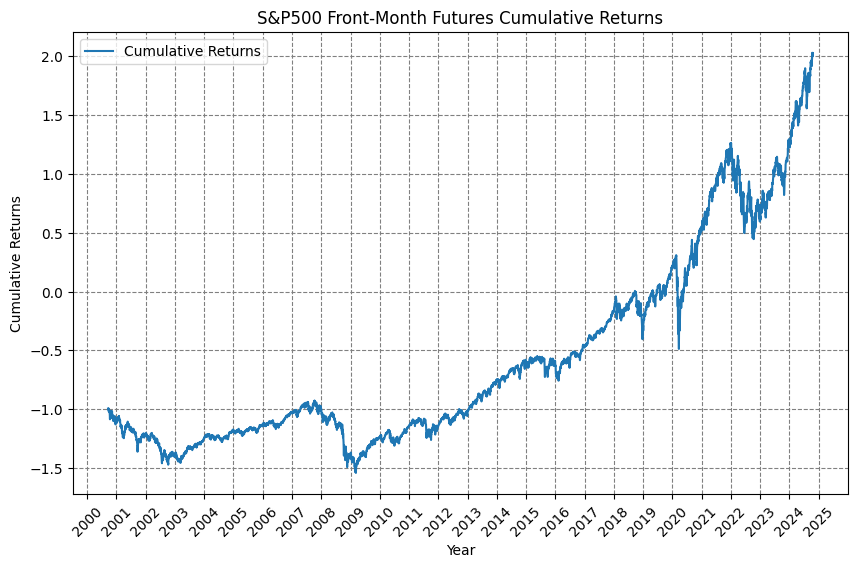

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(cumulative_return - 1, label='Cumulative Returns')
plt.title('S&P500 Front-Month Futures Cumulative Returns')
plt.xlabel('Year')
plt.ylabel('Cumulative Returns')
# Setting x-axis major locator to each year and formatter
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# Adding grid with vertical lines for each year
plt.grid(True, which='major', linestyle='--', color='grey')
# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)
plt.legend()
plt.show()


We create a plot to visualize the cumulative returns:
- **Figure Size**: Sets the size of the plot for better visibility.
- **Plotting**: Plots the cumulative returns over time.
- **Title and Labels**: Adds a title and axis labels.
- **X-Axis Formatting**: Formats the x-axis to show years using `YearLocator` and `DateFormatter`.
- **Grid**: Adds a grid with vertical lines at each year for better readability.
- **Rotation**: Rotates the x-axis labels to prevent overlap.
- **Legend**: Displays the legend.
- **Display**: Shows the final plot.